# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [19]:
# Extract all rows of data
tables = soup.find_all('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for table in tables:
    rows = table.find_all('tr')
    for row in rows:
        columns = row.find_all('td')
        
        if len(columns) >= 7:
            row_data = {
                'id': columns[0].text.strip(),
                'terrestrial_date': columns[1].text.strip(),
                'sol': columns[2].text.strip(),
                'ls': columns[3].text.strip(),
                'month': columns[4].text.strip(),
                'min_temp': columns[5].text.strip(),
                'pressure': columns[6].text.strip()
            }
            mars_data.append(row_data)

In [22]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_data)

In [23]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [24]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [26]:
# Change data types for data analysis
df['id'] = df['id'].astype(float)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [27]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                         float64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [28]:
# 1. How many months are there on Mars?
mars_months = df['month'].max()
print(mars_months)

12


In [29]:
# 2. How many sols (Martian days) worth of data are there?
mars_sols = df['sol'].max()
print(mars_sols)

1977


In [30]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


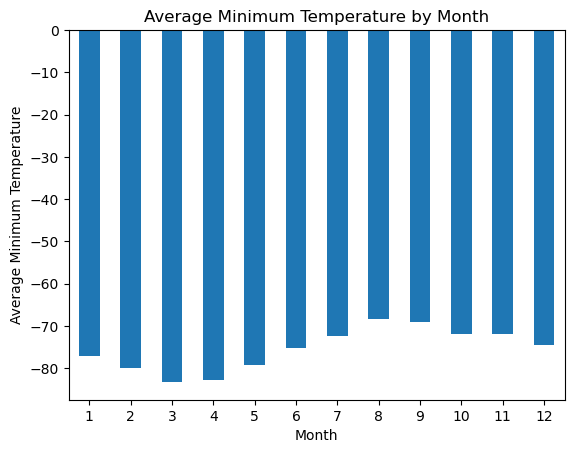

In [37]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.xticks(rotation=0)
plt.show()

In [56]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_temp = df['min_temp'].min()
hottest_temp = df['min_temp'].max()

coldest_month = df.loc[df['min_temp'] == coldest_temp, 'month'].values[0]
hottest_month = df.loc[df['min_temp'] == hottest_temp, 'month'].values[0]

print(f'The coldest month is {coldest_month} with a temperature of {coldest_temp} degrees Celcius.')
print(f'The hottest month is {hottest_month} with a temperature of {hottest_temp} degrees Celcius.')

The coldest month is 3 with a temperature of -90.0 degrees Celcius.
The hottest month is 1 with a temperature of -62.0 degrees Celcius.


In [39]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


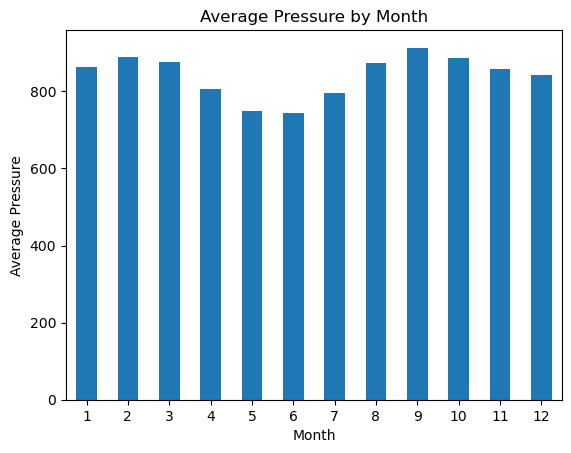

In [40]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=0)
plt.show()

In [57]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure = df['pressure'].min()
highest_pressure = df['pressure'].max()

lowest_month = df.loc[df['pressure'] == lowest_pressure, 'month'].values[0]
highest_month = df.loc[df['pressure'] == highest_pressure, 'month'].values[0]

print(f'The month with the lowest pressure is {lowest_month} with a pressure of {lowest_pressure}.')
print(f'The month with the highest pressure is {highest_month} with a pressure of {highest_pressure}.')

The month with the lowest pressure is 5 with a pressure of 727.0.
The month with the highest pressure is 9 with a pressure of 925.0.


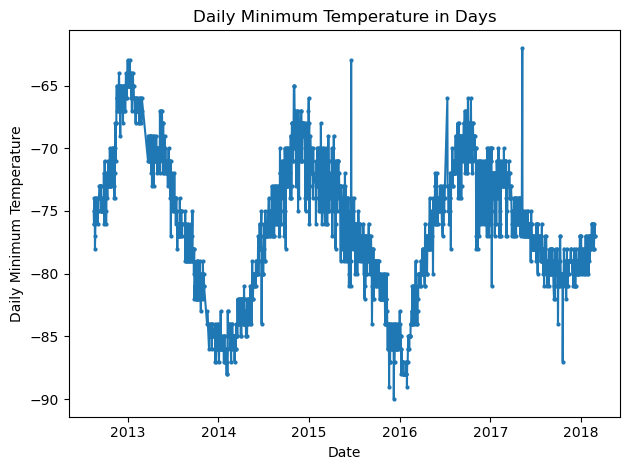

The estimated number of terrestrial (Earth) days there are in a Martian year is 289.5


In [59]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', markersize=2)
plt.title('Daily Minimum Temperature in Days')
plt.xlabel('Date')
plt.ylabel('Daily Minimum Temperature')
plt.tight_layout()
plt.show()

df_2013 = df[df['terrestrial_date'].dt.year == 2013]
df_2014 = df[df['terrestrial_date'].dt.year == 2014]
df_2015 = df[df['terrestrial_date'].dt.year == 2015]
df_2016 = df[df['terrestrial_date'].dt.year == 2016]
df_2017 = df[df['terrestrial_date'].dt.year == 2017]
df_2018 = df[df['terrestrial_date'].dt.year == 2018]

martian_year_days_2013 = df_2013['min_temp'].count()
martian_year_days_2014 = df_2014['min_temp'].count()
martian_year_days_2015 = df_2015['min_temp'].count()
martian_year_days_2016 = df_2016['min_temp'].count()
martian_year_days_2017 = df_2017['min_temp'].count()
martian_year_days_2018 = df_2018['min_temp'].count()

estimate_days = (martian_year_days_2013+martian_year_days_2014+martian_year_days_2015+martian_year_days_2016+martian_year_days_2017+martian_year_days_2018)/6


print(f'The estimated number of terrestrial (Earth) days there are in a Martian year is {estimate_days}')

#### Minimum Temperature

According to the data, we see that the month with the lowest temperature was Month 3 with a temperature of -90.0 degrees Celcius.

The hottest month is Month 1 with a temperature of -62.0 degrees Celcius.

#### Atmospheric Pressure

According to the data, the month with the lowest pressure is Month 5 with a pressure of 727.0.

The month with the highest pressure is Month 9 with a pressure of 925.0.

#### Year Length

By taking the average amount of days from 2013-2018 reported by minimum temperature, we find that the estimated Earth days in a Martian year is 289.5.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [ ]:
browser.quit()